In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Importing various necessary libraries

In [2]:
car_sales = '/content/Car_sales.csv'
df = pd.read_csv(car_sales)


Readinf the CSV file as dataframe

In [3]:
df.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
print('no of rows:',df.shape[0])#
inital_count=df.shape[0]
print('no of columns:',df.shape[1])
print('no of nan/missing values',df.isnull().sum().sum())

print('              ')
datatypes = df.dtypes
print(datatypes)
print("       ")

print('No of null values',df.isnull().sum())# shows null values by column, counts number of true values returned from isnull function

no of rows: 157
no of columns: 16
no of nan/missing values 51
              
Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object
       
No of null values Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch          

Finding the number of rows and columns of the dataset.
Finding total number of null values across all rows and columns.
Checking data type of all columns.
Finding number of null values per column.

In [5]:
# removing na values
df=df.dropna(axis=0)

Dropping all null values from the dataframe

In [6]:
print(df.isnull().sum())
print('   ')
print('Shape of dataframe: ',df.shape)
final_count=df.shape[0]
print('No of rows dropped',inital_count-final_count)

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64
   
Shape of dataframe:  (117, 16)
No of rows dropped 40


Checking the number of null values after dropping null values.
Finding the number of rows dropped.

In [7]:
print(df['Manufacturer'].unique(),'        **total number of Manufactures = ',len(df['Manufacturer'].unique()),'**')
print('     ')

#general info
most_expensive_car=df.loc[[df['Price_in_thousands'].idxmax()]]
print(most_expensive_car)
least_expensive_car=df.loc[[df['Price_in_thousands'].idxmin()]]
print(least_expensive_car)
avg_car_length=df['Length'].mean()

#casting
print(df['Fuel_capacity'].dtypes)
df = df.astype({'Fuel_capacity':'int'})
print(df['Fuel_capacity'].dtypes)

#Finding total sales value
by_brand = df.groupby(['Manufacturer'])['Manufacturer'].count()

total_sales_bybrand=df.groupby(['Manufacturer'])['Sales_in_thousands'].sum()*1000
print('Highest sales by value:',total_sales_bybrand.idxmax(),':',int(total_sales_bybrand.max()))

#filtering
df[df['Horsepower'] > 300]





['Acura' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Honda' 'Hyundai' 'Infiniti' 'Jeep' 'Lexus' 'Lincoln' 'Mitsubishi'
 'Mercury' 'Mercedes-B' 'Nissan' 'Oldsmobile' 'Plymouth' 'Pontiac'
 'Porsche' 'Saturn' 'Toyota' 'Volkswagen']         **total number of Manufactures =  26 **
     
   Manufacturer     Model  Sales_in_thousands  __year_resale_value  \
95   Mercedes-B  SL-Class               3.311                 58.6   

   Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
95    Passenger                82.6          5.0       302.0       99.0   

    Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
95   71.3   177.1        4.125           21.1             20.0     3/17/2011   

    Power_perf_factor  
95         139.982294  
   Manufacturer  Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
26    Chevrolet  Metro              21.855                 5.16    Passenger   

    Price_in_thousands  Eng

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23,21.0,2/27/2012,134.656858
24,Chevrolet,Corvette,17.947,36.225,Passenger,45.705,5.7,345.0,104.5,73.6,179.7,3.210,19,22.0,5/12/2012,141.141150
39,Dodge,Viper,0.916,58.470,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19,16.0,8/7/2011,188.144323
95,Mercedes-B,SL-Class,3.311,58.600,Passenger,82.600,5.0,302.0,99.0,71.3,177.1,4.125,21,20.0,3/17/2011,139.982294


In [8]:
a=df[df['Horsepower'] > 300]
print(a.shape[0])

4


Finding various Manufacturing car companies of the dataset.
Finding the most and least expensive car.
Finding the average length of the car.
Changing the data type of fuel capacity attribute from float to int.
Finding the total number of cars of each different Manufacturer.
Finding total sales of each Manufacturing company.
Filtering data based on horsepower


In [9]:
# Analysing p/r ratio of different vehicle types
df['p/w']=df['Horsepower']/df['Curb_weight']
df2=df[df['Vehicle_type'] == 'Car']#filtering sedans, df2 p/w of cars only
df2=df2.sort_values(by=['p/w'])
df2=df2[['Vehicle_type','p/w']]
# print(df2['p/r'])

df3= df[df['Vehicle_type'] == 'Passenger']# filtering suv, p/w of passenger/suv only
df3=df3.sort_values(by=['p/w'])
df3=df3[['Vehicle_type','p/w']]
# print(df3['p/r'])

print(df2.describe())
print(df3.describe())

             p/w
count  29.000000
mean   46.359121
std     5.876127
min    33.736295
25%    42.517007
50%    45.355701
75%    50.257732
max    59.486537
              p/w
count   88.000000
mean    56.833374
std     15.140907
min     29.023747
25%     49.075086
50%     53.602620
75%     61.093491
max    133.333333


Creating a new attribute called power to weight ration and analysing this attribute based of car type.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


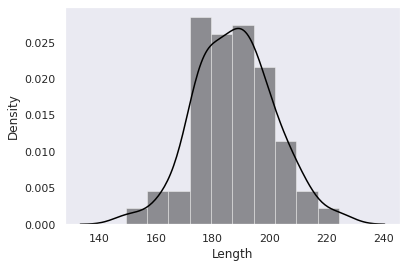

In [10]:
#line plot of car length

sns.set(style="dark")
sns.distplot(df['Length'], kde=True, color="black")

Plotting histogram for length of car. This graph is a normal distribution, and we get its density curve. From observation we can analyse that most of the cars length lies between 180-200. 

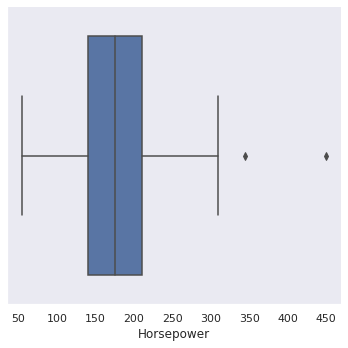

In [11]:
#whisker plot
sns.catplot(x='Horsepower', kind='box', data=df)


This a box/whisker plot. It shows Q1,Q2,Q3 values of column horsepower.
The 25th percentile/Q1 is at approximately 150.
The 50th percentile/Q2/median is approximately 175.
The 75th percentile/Q3 is at approximately 200
The interquatile range is 200-150=50

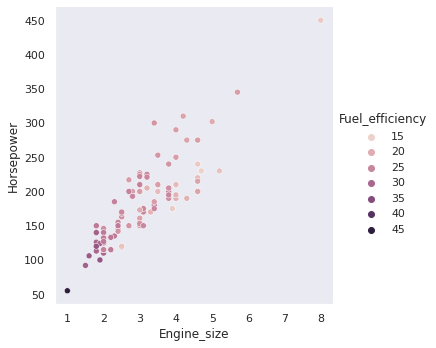

In [12]:
sns.relplot(x='Engine_size', y='Horsepower',hue='Fuel_efficiency', data=df)

This is a scatter plot, It shows that as engine size increases, horsepower also increases and fuel effeciency decreases.Hence engine size and horsepower are driectly proportional while engine size and fuel effeciency are inversely proportional

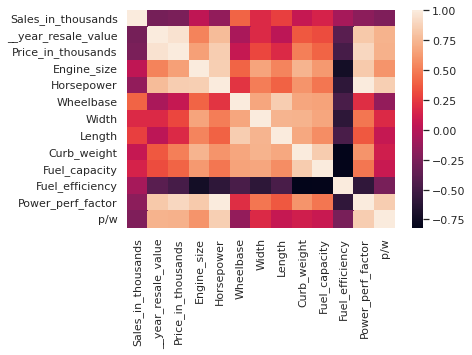

In [13]:
sns.heatmap(df.corr())

This is a heat map which show realation of attributes with respect to other attributes.

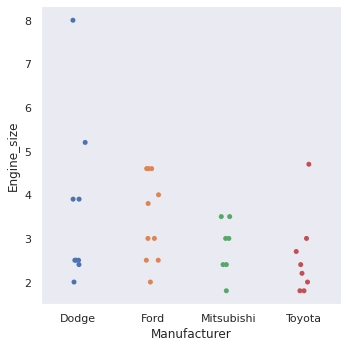

In [14]:
df4= df[ (df['Manufacturer'] == 'Ford') | (df['Manufacturer']=='Dodge') | (df['Manufacturer']=='Toyota') | (df['Manufacturer']=='Mitsubishi') | (df['Manufacturer']=='Chevrole')  ]
sns.catplot(y='Engine_size',x='Manufacturer',data=df4)

This graph shows the comparison of the engine size with respect to car manufacturer, with every indivisual car having different car engine size

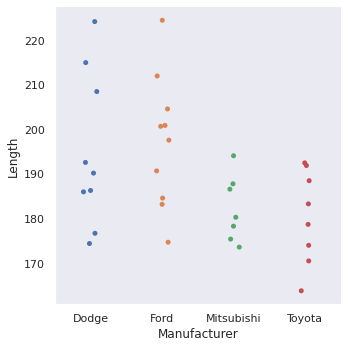

In [15]:
sns.catplot(y='Length',x='Manufacturer',data=df4)

This graph compares the length of cars of different manufacturer, the length of car is in inches

This graph shows the com

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


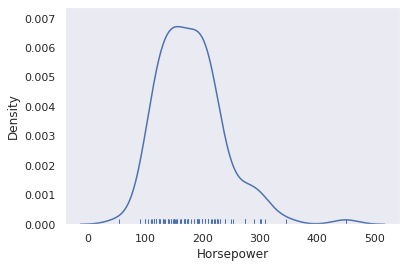

In [16]:
sns.distplot(df['Horsepower'], bins=20, rug=True, hist=False)

This graph shows the probability of car having a certain horsepower. The maximum probability in this case lies between 150-200.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


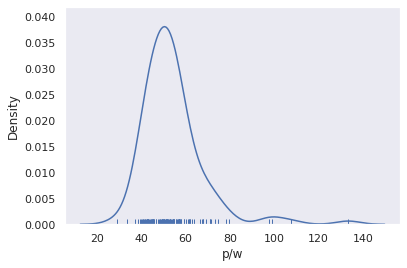

In [17]:
sns.distplot(df['p/w'], bins=20, rug=True, hist=False)

This graph shows probability of car having certain power to weight ration. The maximum probability lies between 45-60 approximately.

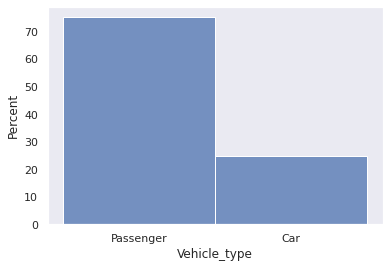

In [19]:
sns.histplot(data=df, x="Vehicle_type" , stat='percent')

This graph shows the frequency of passenger(vehicle type) and car (vehicle type) in percentage